In [10]:

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Załadowanie zbioru danych MNIST
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalizacja danych (wszystkie wartości pikseli z przedziału [0, 255] zmieniamy na [0, 1])
train_images = train_images / 255.0
test_images = test_images / 255.0

In [11]:
# Inicjalizacja modelu
model = models.Sequential()

# Spłaszczenie danych (zmiana 28x28 pikseli na wektor 784 wartości)
model.add(layers.Flatten(input_shape=(28, 28)))

# Dodanie warstwy ukrytej z 128 neuronami i funkcją aktywacji ReLU
model.add(layers.Dense(128, activation='relu'))

# Dodanie warstwy wyjściowej z 10 neuronami (po jednym dla każdej cyfry) z funkcją aktywacji softmax
model.add(layers.Dense(10, activation='softmax'))

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2562 - accuracy: 0.9279
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1125 - accuracy: 0.9679
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0783 - accuracy: 0.9764
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0592 - accuracy: 0.9812
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0453 - accuracy: 0.9861


In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0827 - accuracy: 0.9732
Test accuracy: 0.9732000231742859


In [6]:
# model = models.Sequential()
# model.add(layers.Flatten(input_shape=(28, 28)))
# model.add(layers.Dense(128, activation='relu'))
# model.add(layers.Dropout(0.5))  # Warstwa dropout
# model.add(layers.Dense(10, activation='softmax'))

313/313 [==============================] - 0s 1ms/step
Predykcja: 7
Prawdziwa etykieta: 7


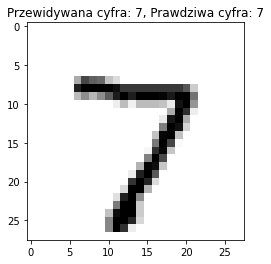

In [15]:

import matplotlib.pyplot as plt
# Wykonanie predykcji na zbiorze testowym
predictions = model.predict(test_images)

# Sprawdzenie pierwszego obrazu ze zbioru testowego
predicted_label = np.argmax(predictions[0])
true_label = test_labels[0]

print(f'Predykcja: {predicted_label}')
print(f'Prawdziwa etykieta: {true_label}')

# Wyświetlenie obrazu i wyniku
plt.imshow(test_images[0], cmap=plt.cm.binary)
plt.title(f'Przewidywana cyfra: {predicted_label}, Prawdziwa cyfra: {true_label}')
plt.show()

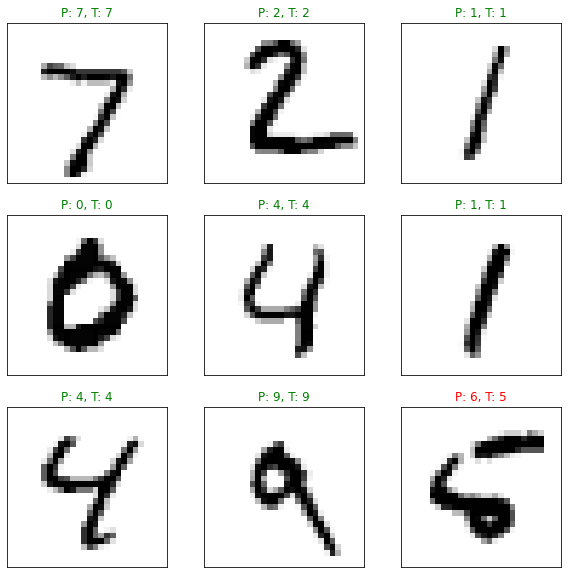

In [16]:
# Ustawienie siatki 3x3 na 9 obrazów
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.xticks([])  # Ukryj osie X
    plt.yticks([])  # Ukryj osie Y
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    
    # Przewidywana etykieta
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    
    # Ustawienie tytułu obrazu
    plt.title(f'P: {predicted_label}, T: {true_label}', color='green' if predicted_label == true_label else 'red')

plt.show()